# Countries Clustering Assignment

In [1]:
import warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
countries = pd.read_csv("Country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# EDA

In [4]:
countries.shape

(167, 10)

In [5]:
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#converting exports,health and imports to actual values
countries['exports_act'] = countries['exports']*countries['gdpp']/100
countries['health_act'] = countries['health']*countries['gdpp']/100
countries['imports_act'] = countries['imports']*countries['gdpp']/100

In [7]:
countries.drop('exports', axis = 1, inplace = True)
countries.drop('imports', axis = 1, inplace = True)
countries.drop('health', axis = 1, inplace = True)

In [8]:
countries.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [9]:
countries.set_index('country', inplace = True)

In [10]:
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
country,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


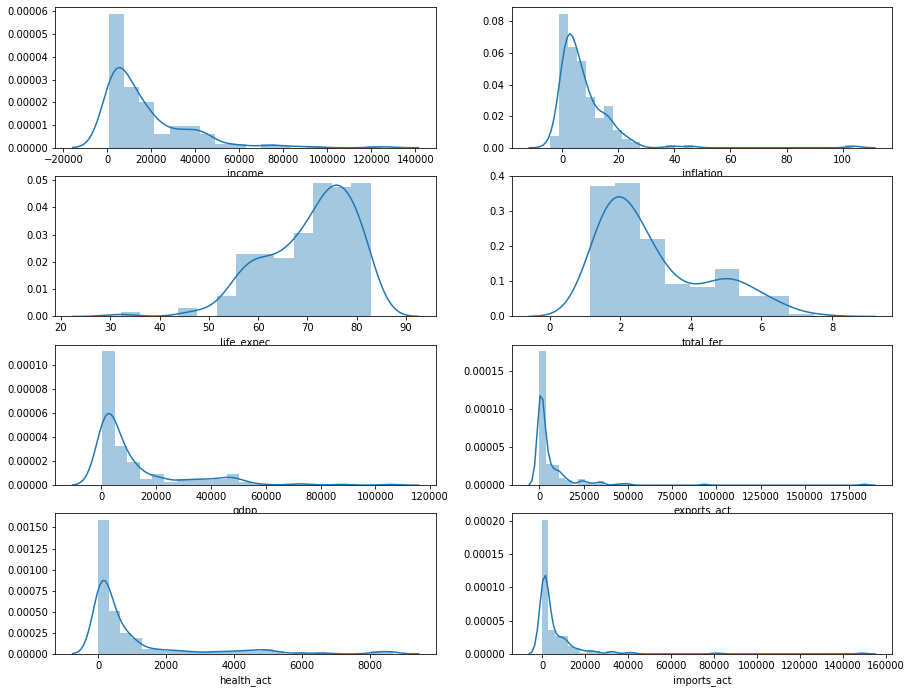

In [11]:
plt.figure(figsize = (15,15))
f = countries.columns[1:]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(countries[i[1]])

In [12]:
#to understand the variation in data
countries.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,1056.733204,6588.352108
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,1801.408906,14710.810418
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,12.821200,0.651092
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,78.535500,640.215000
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,321.886000,2045.580000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,976.940000,7719.600000
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,8663.600000,149100.000000


In [13]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   child_mort   167 non-null    float64
 1   income       167 non-null    int64  
 2   inflation    167 non-null    float64
 3   life_expec   167 non-null    float64
 4   total_fer    167 non-null    float64
 5   gdpp         167 non-null    int64  
 6   exports_act  167 non-null    float64
 7   health_act   167 non-null    float64
 8   imports_act  167 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [14]:
# Bivariate and multi-variate analysis

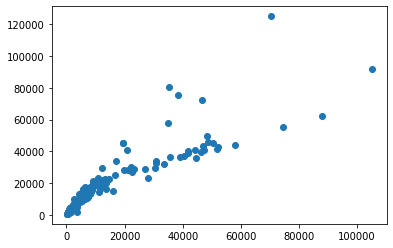

In [15]:
plt.scatter(x = 'gdpp', y = 'income', data = countries)

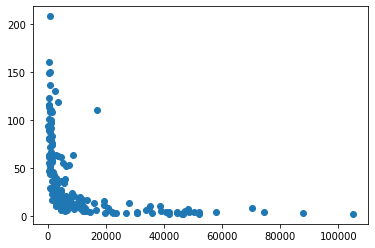

In [16]:
plt.scatter(x = 'gdpp', y = 'child_mort', data = countries)

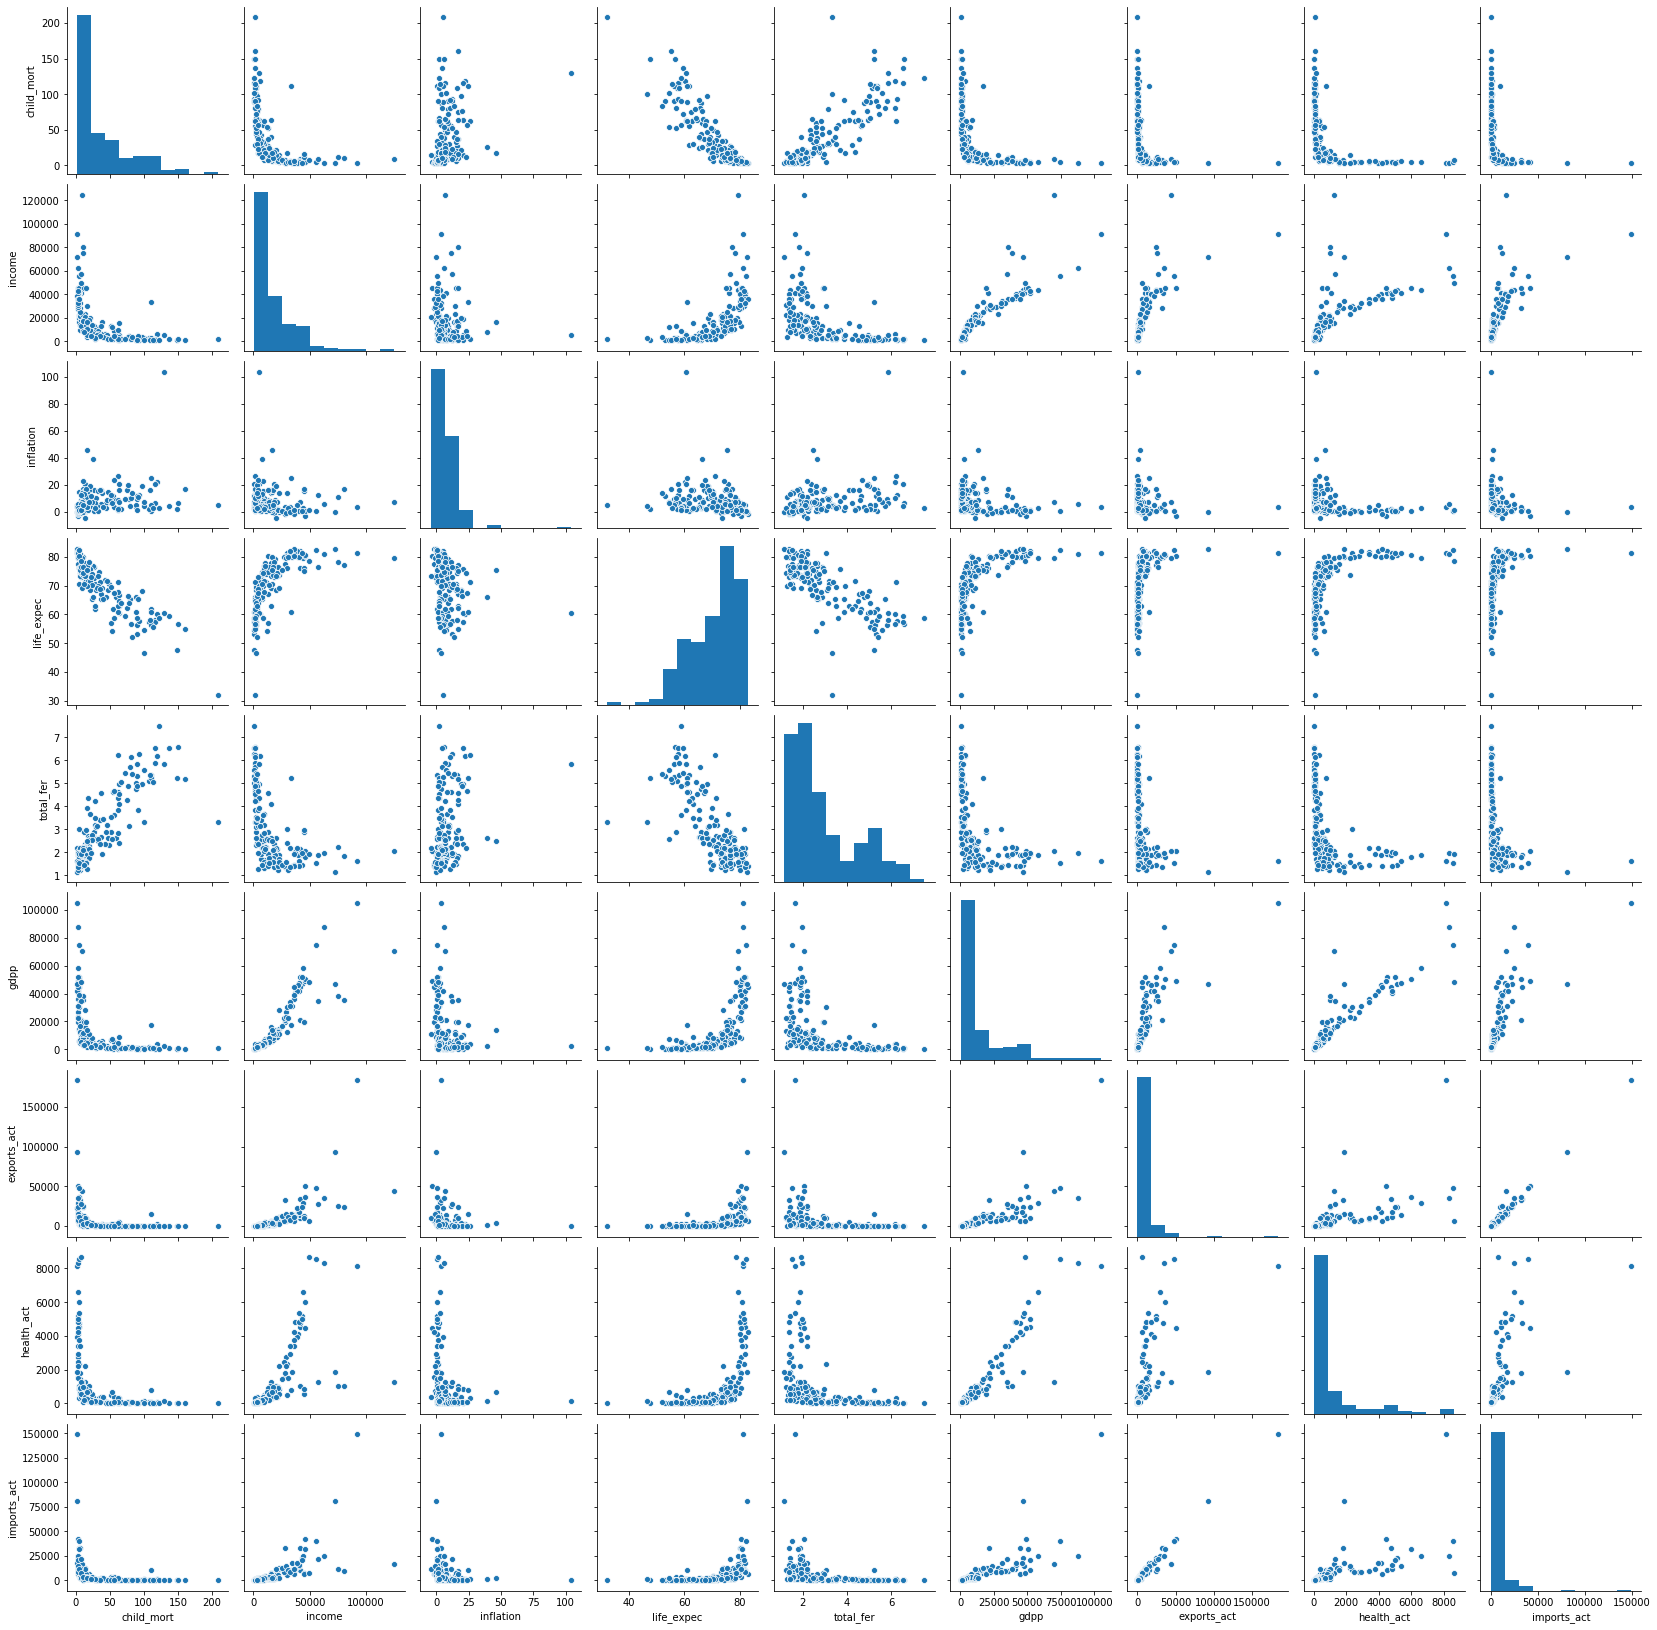

In [17]:
sns.pairplot(countries)
plt.show()

# Outlier Treatment

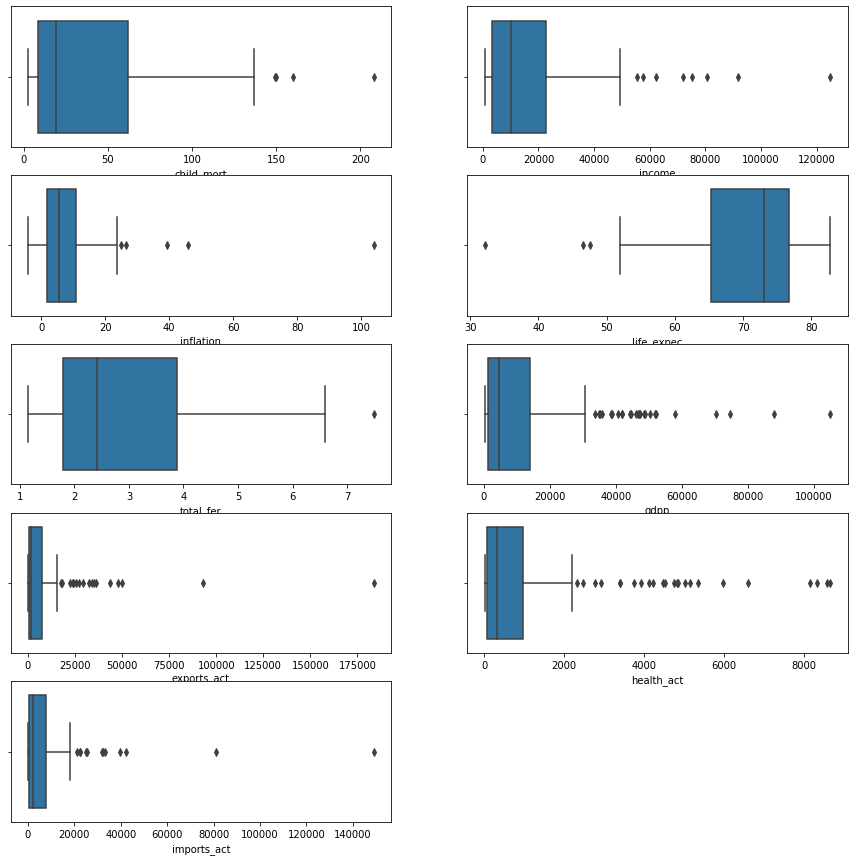

In [18]:
plt.figure(figsize = (15,15))
f = countries.columns[0:]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = countries)

In [19]:
countries.columns

Index(['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp',
       'exports_act', 'health_act', 'imports_act'],
      dtype='object')

In [20]:
#soft capping for rest of the columns
rest=['income', 'total_fer', 'gdpp', 'exports_act', 'health_act', 'imports_act']
for i in rest:
    q4 = countries[i].quantile(0.98)
    countries = countries[(countries[i]<=q4)]

In [21]:
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
country,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


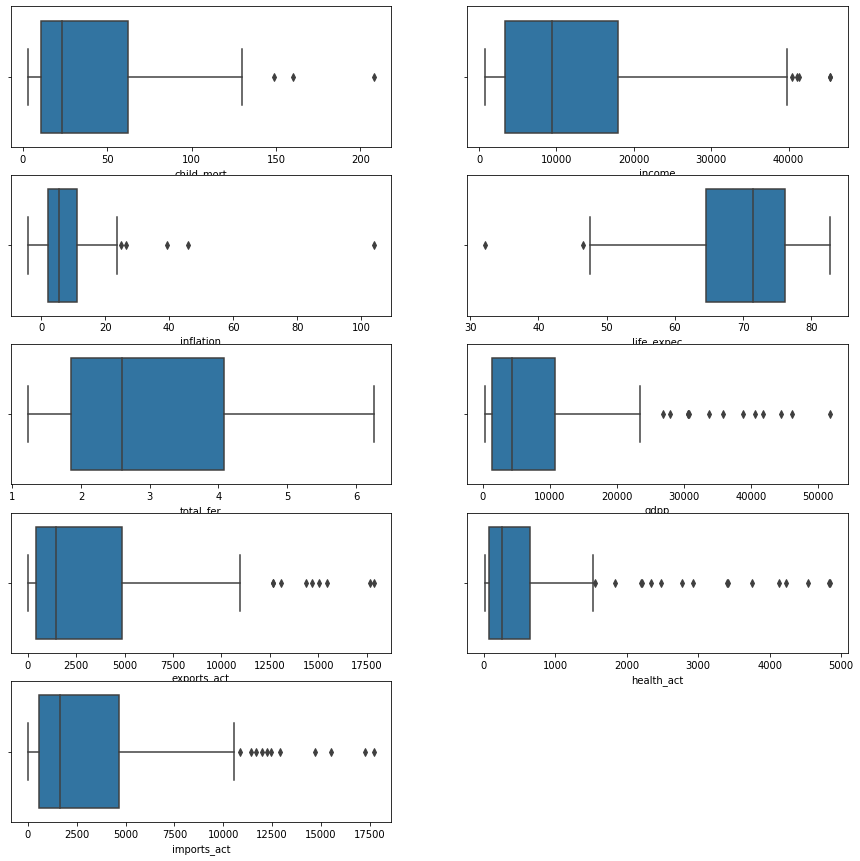

In [22]:
#Plotting after capping
plt.figure(figsize = (15,15))
f = countries.columns[0:]
for i in enumerate(f):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x = i[1], data = countries)

# Hopkins

In [23]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
hopkins(countries)

0.8956309421271058

# SCALING

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(countries)
df1

array([[ 1.31048171, -0.96994718,  0.11159742, ..., -0.77890686,
        -0.58859965, -0.79169398],
       [-0.60192918, -0.23163457, -0.33701863, ..., -0.52156562,
        -0.36696045, -0.35623948],
       [-0.32390205,  0.03192174,  0.71518992, ..., -0.38758479,
        -0.44730085, -0.50326495],
       ...,
       [-0.42783742, -0.71437743,  0.3526719 , ..., -0.56926076,
        -0.54182855, -0.59083936],
       [ 0.42962941, -0.71526482,  1.39491121, ..., -0.69917098,
        -0.56315707, -0.74103916],
       [ 1.12599642, -0.82175222,  0.52486796, ..., -0.66441492,
        -0.54536925, -0.74091399]])

In [26]:
df1 = pd.DataFrame(df1)
df1.columns = countries.columns[0:]
df1.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
0,1.310482,-0.969947,0.111597,-1.573823,1.987110,-0.732474,-0.778907,-0.588600,-0.791694
1,-0.601929,-0.231635,-0.337019,0.768707,-0.935480,-0.400102,-0.521566,-0.366960,-0.356239
2,-0.323902,0.031922,0.715190,0.792016,-0.066413,-0.365334,-0.387585,-0.447301,-0.503265
3,2.058816,-0.589255,1.286156,-1.119303,2.225403,-0.452726,-0.272703,-0.531039,-0.474744
4,-0.765627,0.582107,-0.613439,0.826979,-0.599067,0.361993,0.518708,0.091824,0.945050


# KMeans clustering

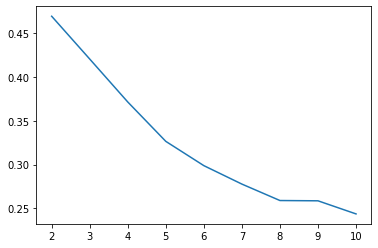

In [27]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

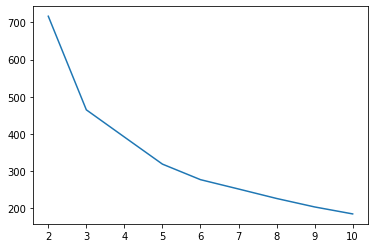

In [28]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

# KMean with K=3

In [29]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [30]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2])

In [31]:
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
country,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [32]:
## Adding the labels with the original DF
countries['cluster_id'] = kmean.labels_

In [33]:
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,2
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,0
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,0
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,2
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,0


In [34]:
# Check the number of Data Points in each cluster
countries.cluster_id.value_counts()

0    80
2    40
1    25
Name: cluster_id, dtype: int64

# Plotting the cluster WRT to the data

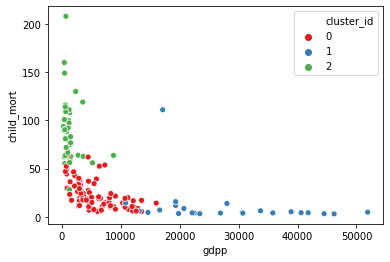

In [35]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = countries, hue = 'cluster_id', palette ='Set1')

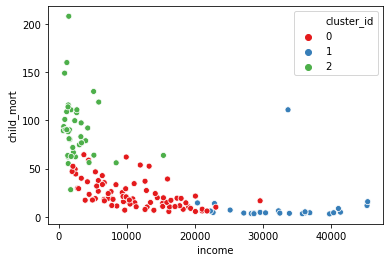

In [36]:
sns.scatterplot(x = 'income', y = 'child_mort', data = countries, hue = 'cluster_id', palette ='Set1')

# Cluster Profiling

In [37]:
countries[['child_mort', 'income', 'gdpp','cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,23.635,11136.125,5707.525
1,10.320,32692.000,27988.000
2,90.430,2753.750,1353.125


<Figure size 1080x1080 with 0 Axes>

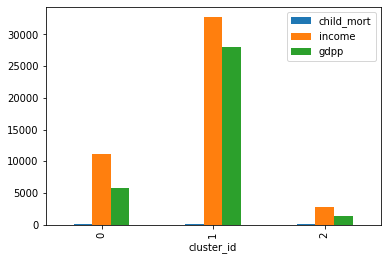

In [61]:
plt.figure(figsize = (15,15))
countries[['child_mort', 'income', 'gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

# Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [40]:
df1.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act
0,1.310482,-0.969947,0.111597,-1.573823,1.987110,-0.732474,-0.778907,-0.588600,-0.791694
1,-0.601929,-0.231635,-0.337019,0.768707,-0.935480,-0.400102,-0.521566,-0.366960,-0.356239
2,-0.323902,0.031922,0.715190,0.792016,-0.066413,-0.365334,-0.387585,-0.447301,-0.503265
3,2.058816,-0.589255,1.286156,-1.119303,2.225403,-0.452726,-0.272703,-0.531039,-0.474744
4,-0.765627,0.582107,-0.613439,0.826979,-0.599067,0.361993,0.518708,0.091824,0.945050


In [41]:
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,2
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,0
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,0
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,2
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,0


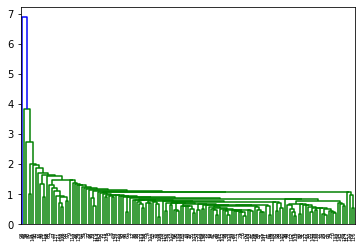

In [42]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

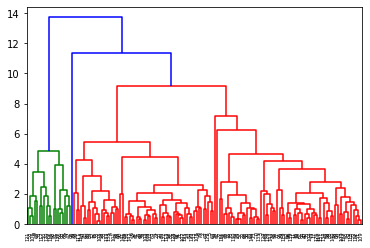

In [43]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [44]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
# assign cluster labels
countries['cluster_labels'] = cluster_labels
countries.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,2,0
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,0,0
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,0,0
Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,2,0
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,0,0


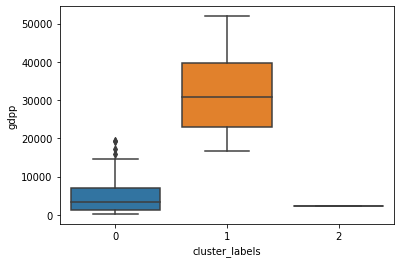

In [46]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)

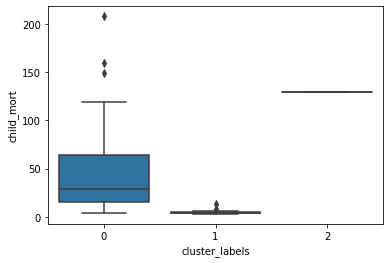

In [47]:
sns.boxplot(x='cluster_labels', y='child_mort', data=countries)

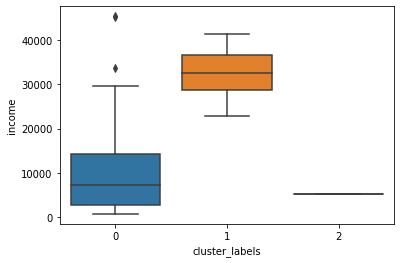

In [48]:
sns.boxplot(x='cluster_labels', y='income', data=countries)

In [49]:
# Check the number of Data Points in each cluster
countries.cluster_labels.value_counts()

0    125
1     19
2      1
Name: cluster_labels, dtype: int64

# Final Inference

In [50]:
c1=countries[countries['cluster_id']==0]

In [51]:
c1.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.895,1987.74,0,0
Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.982,1400.44,0,0
Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.660,7185.80,0,0
Argentina,14.5,18700,20.90,75.8,2.37,10300,1946.70,834.300,1648.00,0,0
Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,141.680,1458.66,0,0


In [52]:
c1.sort_values(by = ['gdpp','child_mort','income'], ascending =[True,False,True]).head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Nepal,47.0,1990,15.10,68.3,2.61,592,56.7136,31.0800,215.488,0,0
Tajikistan,52.4,2110,12.50,69.6,3.51,738,109.9620,44.1324,432.468,0,0
Bangladesh,49.4,2440,7.14,70.4,2.33,758,121.2800,26.6816,165.244,0,0
Cambodia,44.4,2520,3.12,66.1,2.88,786,425.2260,44.6448,467.670,0,0
Kyrgyz Republic,29.6,2790,10.00,68.5,3.10,880,454.0800,54.3840,718.960,0,0


In [53]:
c2=countries[countries['cluster_id']==1]

In [54]:
c2.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Australia,4.8,41400,1.160,82.0,1.93,51900,10276.2,4530.87,10847.1,1,1
Bahamas,13.8,22900,-0.393,73.8,1.86,28000,9800.0,2209.20,12236.0,1,1
Bahrain,8.6,41100,7.440,76.0,2.16,20700,14386.5,1028.79,10536.3,1,1
Cyprus,3.6,33900,2.010,79.9,1.42,30800,15461.6,1838.76,17710.0,1,1
Czech Republic,3.4,28300,-1.430,77.5,1.51,19800,13068.0,1560.24,12454.2,1,1


In [55]:
c2.sort_values(by = ['gdpp','child_mort','income'], ascending =[True,False,True]).head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Seychelles,14.4,20400,-4.210,73.4,2.17,10800,10130.4,367.20,11664.0,1,0
Hungary,6.0,22300,2.330,74.5,1.25,13100,10715.8,960.23,10021.5,1,0
Estonia,4.5,22700,1.740,76.0,1.72,14600,10964.6,880.38,10030.2,1,0
Slovak Republic,7.0,25200,0.485,75.5,1.43,16600,12665.8,1459.14,12914.8,1,1
Equatorial Guinea,111.0,33700,24.900,60.9,5.21,17100,14671.8,766.08,10071.9,1,0


In [56]:
c3=countries[countries['cluster_id']==2]

In [57]:
c3.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,1610,9.440,56.2,5.82,553,55.3000,41.9174,248.297,2,0
Angola,119.0,5900,22.400,60.1,6.16,3530,2199.1900,100.6050,1514.370,2,0
Benin,111.0,1820,0.885,61.8,5.36,758,180.4040,31.0780,281.976,2,0
Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.4000,38.7550,170.200,2,0
Burundi,93.6,764,12.300,57.7,6.26,231,20.6052,26.7960,90.552,2,0


In [58]:
#Final list of target countries
c3.sort_values(by = ['gdpp','child_mort','income'], ascending =[True,False,True]).head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Burundi,93.6,764,12.30,57.7,6.26,231,20.6052,26.7960,90.552,2,0
Liberia,89.3,700,5.47,60.8,5.02,327,62.4570,38.5860,302.802,2,0
Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.0320,52.2690,137.655,2,0
Madagascar,62.2,1390,8.79,60.8,4.60,413,103.2500,15.5701,177.590,2,0
Mozambique,101.0,918,7.64,54.5,5.56,419,131.9850,21.8299,193.578,2,0


In [59]:
#Hierarchical clustering conclusions
h1=countries[countries['cluster_labels']==0]

In [60]:
h1.sort_values(by = ['gdpp','child_mort','income'], ascending =[True,False,True]).head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_act,health_act,imports_act,cluster_id,cluster_labels
country,,,,,,,,,,,
Burundi,93.6,764,12.30,57.7,6.26,231,20.6052,26.7960,90.552,2,0
Liberia,89.3,700,5.47,60.8,5.02,327,62.4570,38.5860,302.802,2,0
Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.0320,52.2690,137.655,2,0
Madagascar,62.2,1390,8.79,60.8,4.60,413,103.2500,15.5701,177.590,2,0
Mozambique,101.0,918,7.64,54.5,5.56,419,131.9850,21.8299,193.578,2,0
